# Nie wieder ist jetzt

https://www.hz.de/lokales/heidenheim/heidenheim-demonstriert-gegen-rechtsextremismus-und-fuer-eine-bunte-gesellschaft

In [1]:
import sys
sys.path.append('../src/')

## Read all sensor data

In [2]:
# Contains as key the sensor name and as value the complete data
from SmartCityHelper.Data import getAllSensors

sensorData = getAllSensors()

print(sensorData.keys())

dict_keys(['Brenzstr', 'FuZo_Eugen-Jaekle-Platz', 'FuZo_Olgastr', 'Arkaden', 'Knoepfle_Nord', 'Knoepfle_Ost'])


## Visualize Sensors

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as md

from SmartCityHelper.Filter import filterDateRange
from SmartCityHelper.Reducer import sumReducer, avgReducer, sumReducerWithReset
import datetime


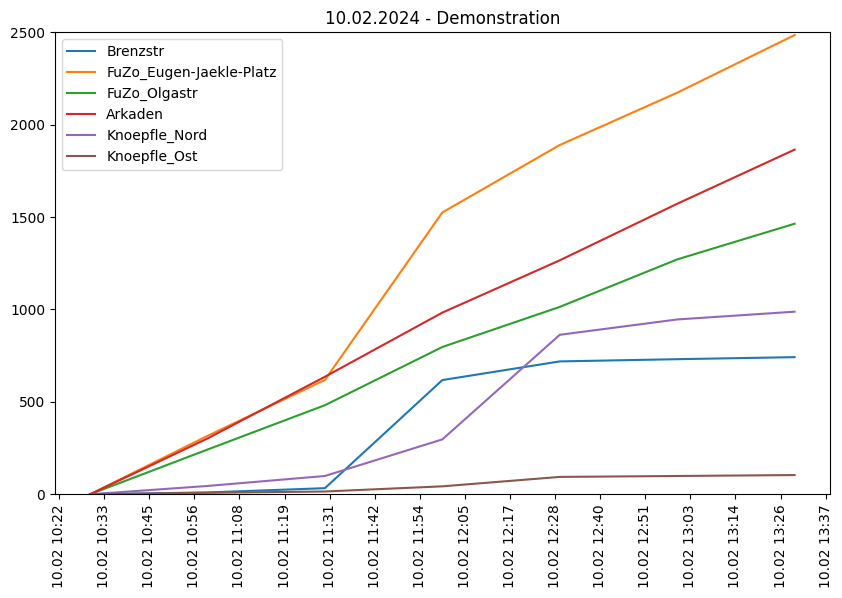

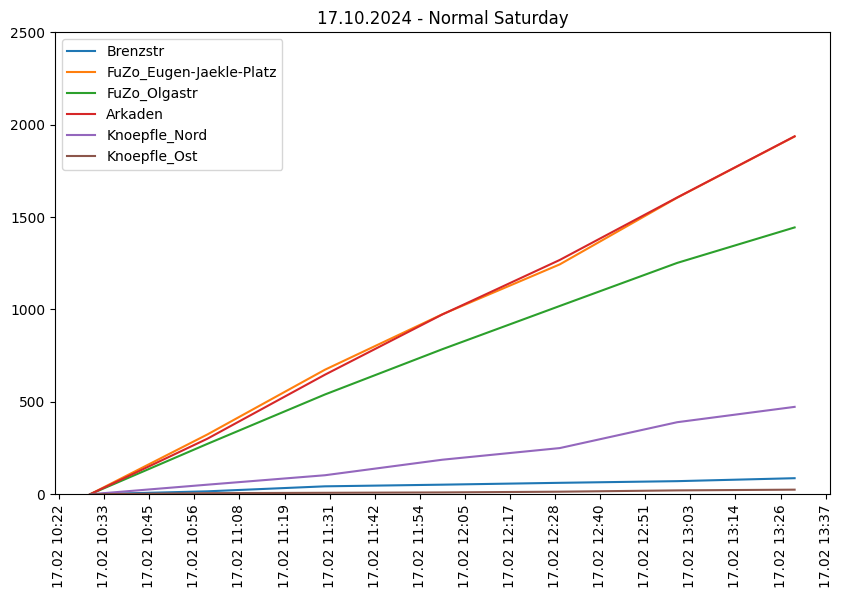

In [4]:
### DEMO

plt.subplots(figsize=(10, 6))
for sensorName, data in sensorData.items():
    dataPoints = dict(sorted(data['singleDataPoints'].items())).values()
    dataPointsDemonstration = [d for d in dataPoints if filterDateRange(d, "2024-02-10 10:00:00", "2024-02-10 14:00:00")]
    dataPointsDemonstration = sumReducer(dataPointsDemonstration, 'person.in')

    x = []
    y = []

    for dataPoint in dataPointsDemonstration:
        y.append(dataPoint['person.in'])
        datetimeValue = datetime.datetime.strptime(dataPoint['datetime'], '%Y-%m-%d %H:%M:%S')
        x.append(datetimeValue)

    plt.plot(x, y, label=sensorName)

plt.ylim(0, 2500)
leg = plt.legend(loc='upper left')
plt.title("10.02.2024 - Demonstration")

ax=plt.gca()
xfmt = md.DateFormatter('%d.%m %H:%M')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=90)
plt.savefig('nie-wieder-ist-jetzt-demonstration.png', bbox_inches="tight")

### SATURDAY

plt.subplots(figsize=(10, 6))
for sensorName, data in sensorData.items():
    dataPoints = dict(sorted(data['singleDataPoints'].items())).values()
    dataPointsDemonstration = [d for d in dataPoints if filterDateRange(d, "2024-02-17 10:00:00", "2024-02-17 14:00:00")]
    dataPointsDemonstration = sumReducer(dataPointsDemonstration, 'person.in')

    x = []
    y = []

    for dataPoint in dataPointsDemonstration:
        y.append(dataPoint['person.in'])
        datetimeValue = datetime.datetime.strptime(dataPoint['datetime'], '%Y-%m-%d %H:%M:%S')
        x.append(datetimeValue)

    plt.plot(x, y, label=sensorName)
    
plt.ylim(0, 2500)
leg = plt.legend(loc='upper left')
plt.title("17.10.2024 - Normal Saturday")

ax=plt.gca()
xfmt = md.DateFormatter('%d.%m %H:%M')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=90)
plt.savefig('nie-wieder-ist-jetzt-saturday.png', bbox_inches="tight")
plt.show()

# Get absoulte numbers:

In [5]:
print("MARKDOWN TABLE:")
print()
print("| Sensor | 10.02. | 17.02. | Difference |")
print("| --- | --- | --- | --- |")

for sensorName, data in sensorData.items():
    dataPoints = dict(sorted(data['singleDataPoints'].items())).values()
    dataPointsDemonstration = [d for d in dataPoints if filterDateRange(d, "2024-02-10 10:00:00", "2024-02-10 14:00:00")]
    dataPointsDemonstration = sumReducer(dataPointsDemonstration, 'person.in')

    dataPointsDemonstrationSaturday = [d for d in dataPoints if filterDateRange(d, "2024-02-17 10:00:00", "2024-02-17 14:00:00")]
    dataPointsDemonstrationSaturday = sumReducer(dataPointsDemonstrationSaturday, 'person.in')

    print("| {0} | {1} | {2} | {3} |".format(sensorName, dataPointsDemonstration[-1]['person.in'], dataPointsDemonstrationSaturday[-1]['person.in'], int(dataPointsDemonstration[-1]['person.in']) - int(dataPointsDemonstrationSaturday[-1]['person.in'])))


MARKDOWN TABLE:

| Sensor | 10.02. | 17.02. | Difference |
| --- | --- | --- | --- |
| Brenzstr | 742 | 87 | 655 |
| FuZo_Eugen-Jaekle-Platz | 2485 | 1936 | 549 |
| FuZo_Olgastr | 1464 | 1444 | 20 |
| Arkaden | 1865 | 1937 | -72 |
| Knoepfle_Nord | 988 | 473 | 515 |
| Knoepfle_Ost | 104 | 25 | 79 |


In [6]:
import folium
import random

# Create a folium map centered at a specific location
m = folium.Map(location=[48.67638280435713, 10.151585739252655], zoom_start=15, zoom_control=False)

# Add markers for each sensor
for sensorName, data in sensorData.items():
    
    #MAX_DELTA =  0.00009
    MAX_DELTA =  0.0002

    latitude = data['latitude'] + (random.uniform(0, 1) * MAX_DELTA) - (MAX_DELTA / 2)
    longitude = data['longitude'] + (random.uniform(0, 1) * MAX_DELTA) - (MAX_DELTA / 2)


    label = folium.Marker(
        location=[latitude, longitude],
        icon=folium.Icon(),
        tooltip=sensorName
    )
    label.add_to(m)

# Display the map
#m.save(outfile= "map_of_sensors.html")
m

